# DCT and IDCT

Date: 2023/10/14, 2023/10/15

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct, idct
import glob

In [2]:
%matplotlib inline
%run ./zigzag.py

DATA_FOLDER = '../python/ThermographyGUI/data/'
SCREENSHOTS_FOLDER = '../python/ThermographyGUI/screenshots/'

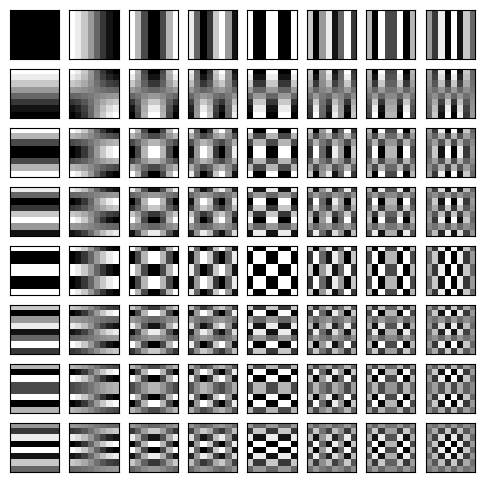

In [3]:
fig, axes = plt.subplots(8,8, figsize=(6,6))
patterns = np.zeros([8,8,8,8])
for i in range(8):
    for j in range(8):
        dcted = np.zeros([8,8])
        dcted[i,j] = 1
        img = idct(idct(dcted, norm='ortho').T, norm='ortho').T
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        axes[i,j].imshow(img, cmap='gray')
        patterns[i,j,:,:] = img

In [4]:
data_files = glob.glob(DATA_FOLDER+'*.csv')
len(data_files)

420

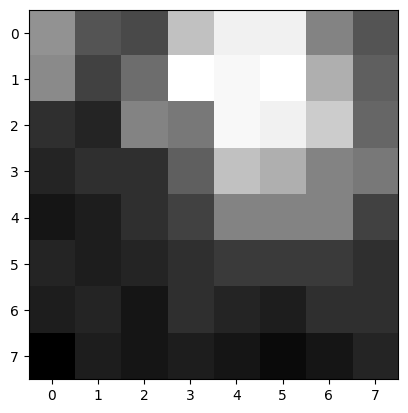

In [5]:
with open(data_files[20]) as f:
    data = np.array(f.read().split(',')).astype(float).reshape(8,8)
plt.imshow(data, cmap='gray')

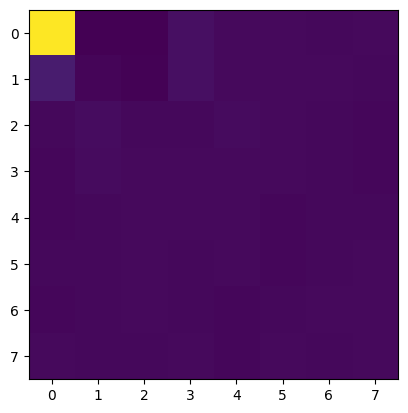

In [6]:
dcted_data = dct(dct(data, norm='ortho').T, norm='ortho').T
plt.imshow(dcted_data, cmap='viridis')

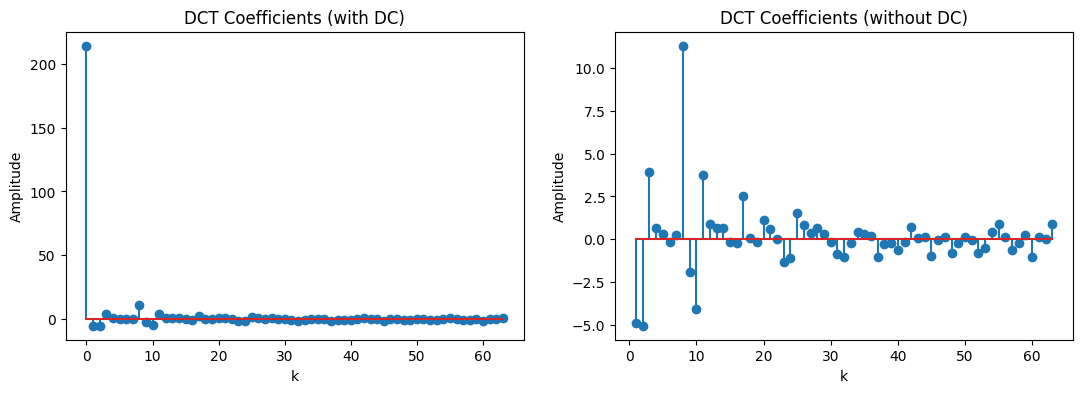

In [7]:
fig, ax = plt.subplots(1,2,figsize=(13,4))
ax[0].stem(dcted_data.flatten())
ax[0].set_title('DCT Coefficients (with DC)')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Amplitude')
ax[1].stem(np.arange(1,64), dcted_data.flatten()[1:])
ax[1].set_title('DCT Coefficients (without DC)')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Amplitude')
plt.show()

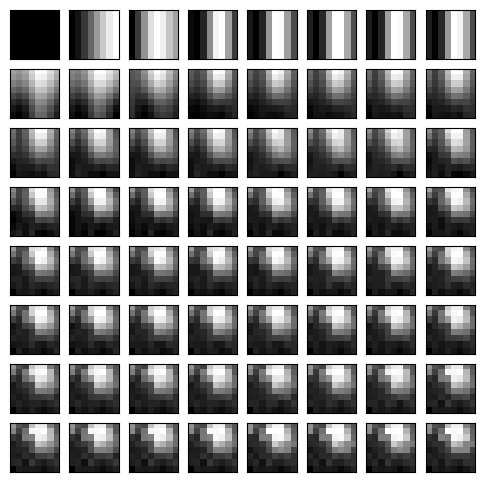

In [8]:
fig, axes = plt.subplots(8,8, figsize=(6,6))
idcted_data = np.zeros([8,8])

for i in range(8):
    for j in range(8):
        idcted_data += dcted_data[i,j] * patterns[i,j]
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        axes[i,j].imshow(idcted_data, cmap='gray')

In [9]:
ZIGZAG = [[0,0],\
          [0,1],\
          [1,0], [2,0],\
          [1,1], [0,2], [0,3],\
          [1,2], [2,1], [3,0], [4,0],\
          [3,1], [2,2], [1,3], [0,4], [0,5],\
          [1,4], [2,3], [3,2], [4,1], [5,0],\
          [6,0], [5,1], [4,2], [3,3], [2,4], [1,5], [0,6],\
          [0,7], [1,6], [2,5], [3,4], [4,3], [5,2], [6,1], [7,0],
          [7,1], [6,2], [5,3], [4,4], [3,5], [2,6], [1,7],\
          [2,7], [3,6], [4,5], [5,4], [6,3], [7,2],\
          [7,3], [6,4], [5,5], [4,6], [3,7],\
          [4,7], [5,6], [6,5], [7,4],\
          [7,5], [6,6], [5,7],\
          [6,7], [7,6],\
          [7,7]]

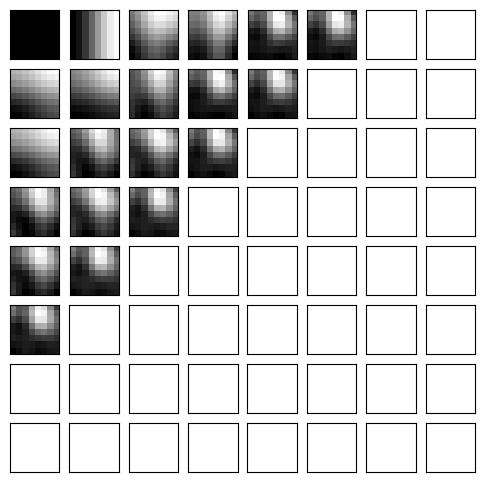

In [10]:
idcted_data = np.zeros([8,8])

fig, axes = plt.subplots(8,8, figsize=(6,6))
for x, y in ZIGZAG[:21]:
    idcted_data += dcted_data[x, y] * patterns[x, y]
    axes[x, y].imshow(idcted_data, cmap='gray')
for x in range(8):
    for y in range(8):
        axes[x, y].set_xticks([])
        axes[x, y].set_yticks([])

../python/ThermographyGUI/data/scissors-20190106130548.csv


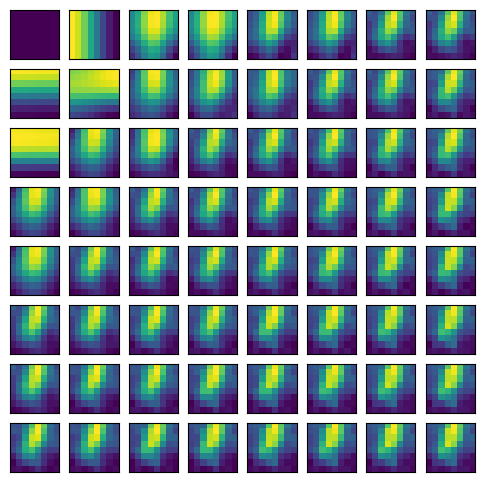

../python/ThermographyGUI/data/scissors-20190106130601.csv


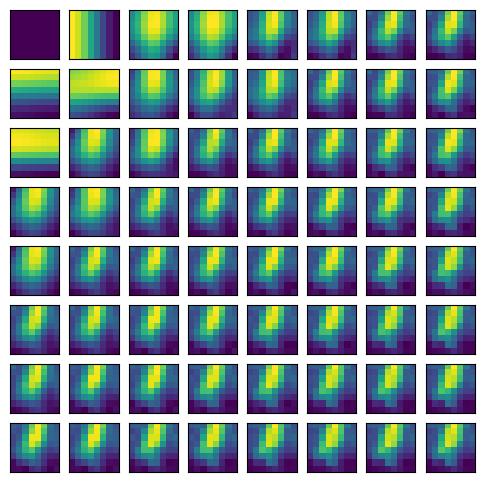

../python/ThermographyGUI/data/scissors-20230914123001.csv


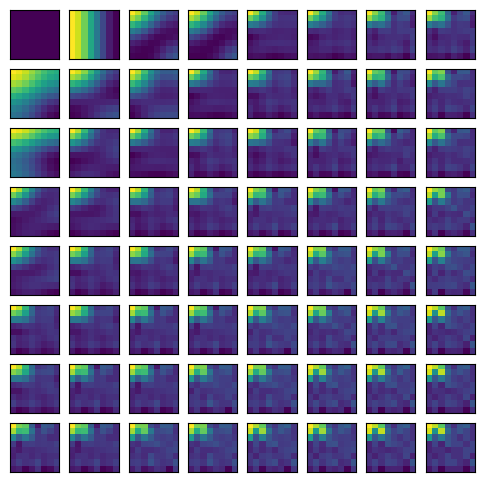

../python/ThermographyGUI/data/rock-20230914121744.csv


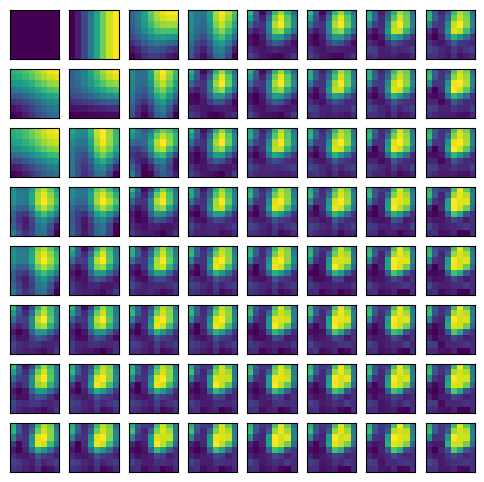

../python/ThermographyGUI/data/paper-20230914122601.csv


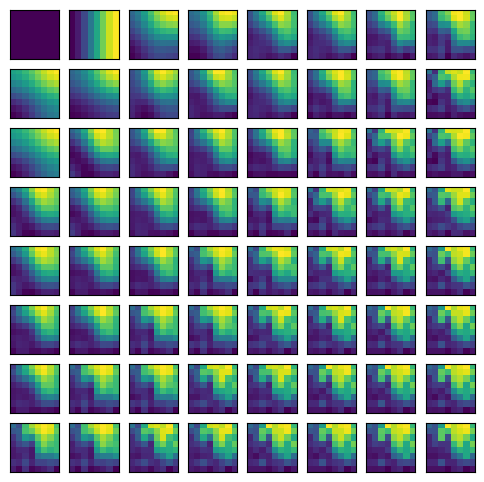

../python/ThermographyGUI/data/scissors-20190104211734.csv


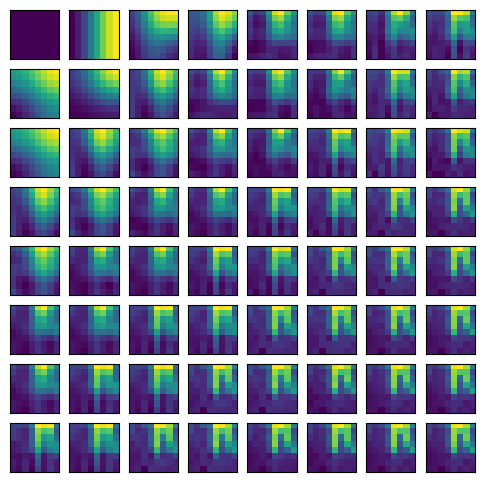

../python/ThermographyGUI/data/scissors-20230914124452.csv


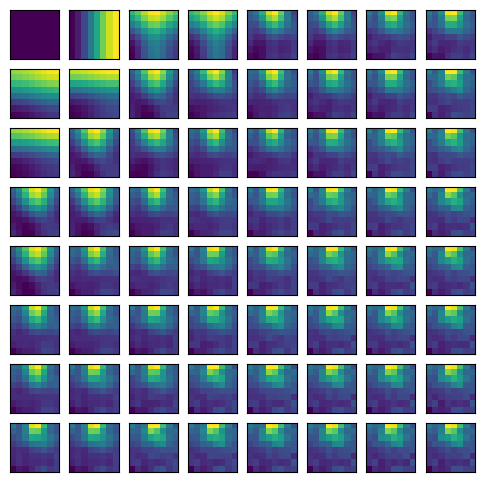

../python/ThermographyGUI/data/scissors-20190104211732.csv


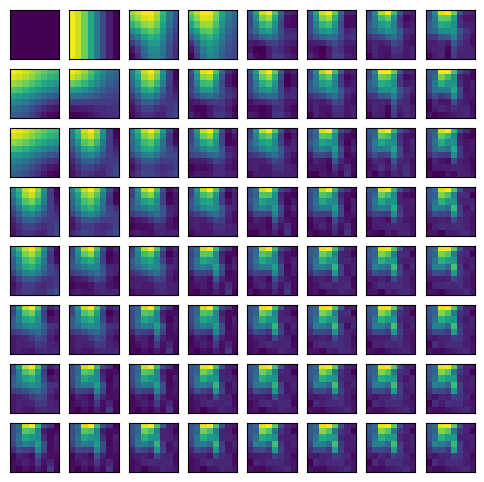

../python/ThermographyGUI/data/rock-20190104211316.csv


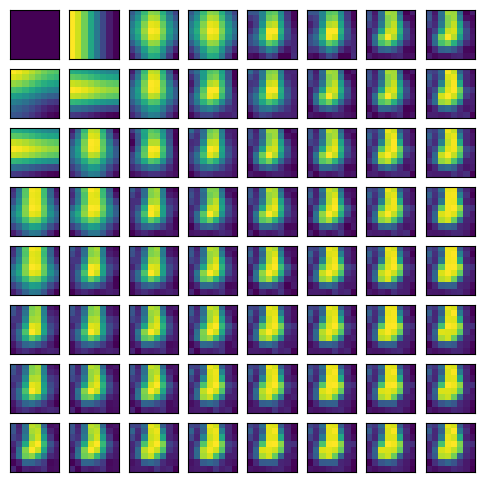

../python/ThermographyGUI/data/paper-20230914121944.csv


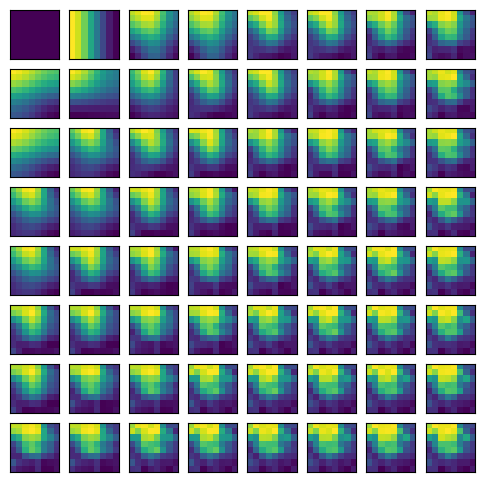

../python/ThermographyGUI/data/scissors-20190104211714.csv


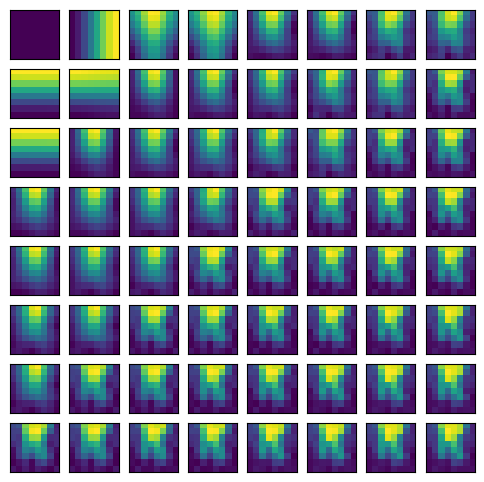

../python/ThermographyGUI/data/scissors-20230914120827.csv


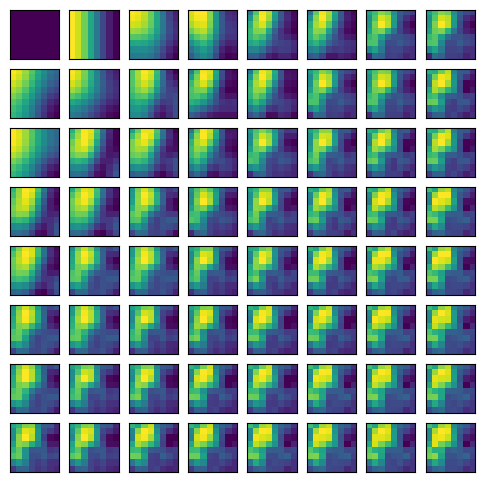

../python/ThermographyGUI/data/paper-20190106130404.csv


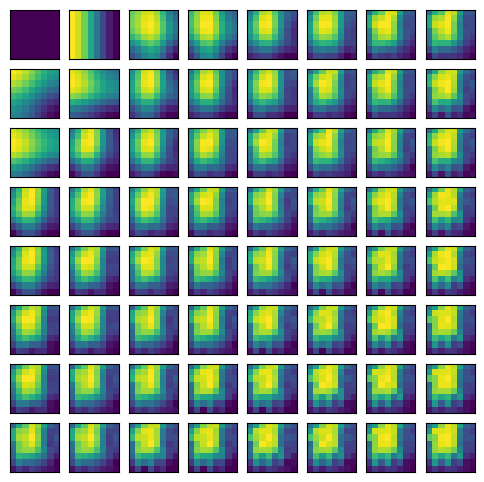

../python/ThermographyGUI/data/scissors-20230914120404.csv


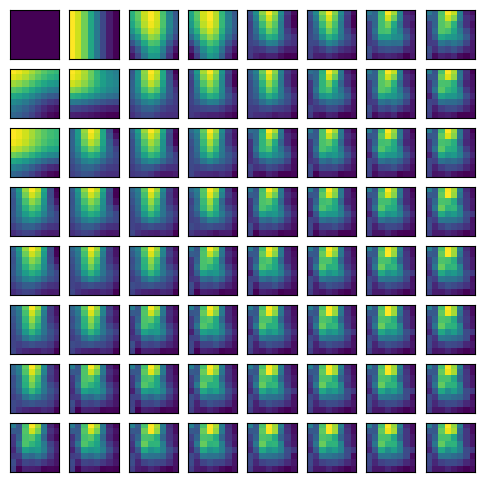

../python/ThermographyGUI/data/scissors-20230914120258.csv


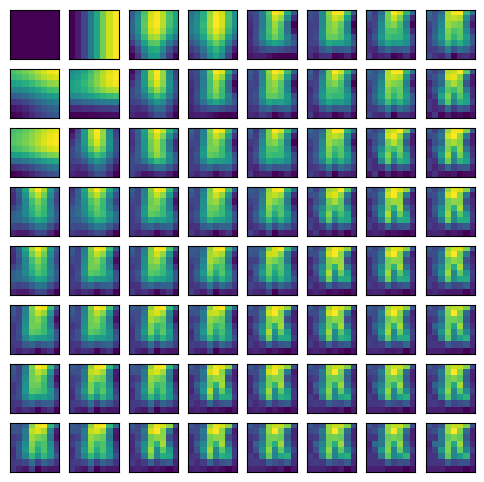

../python/ThermographyGUI/data/paper-20230914123713.csv


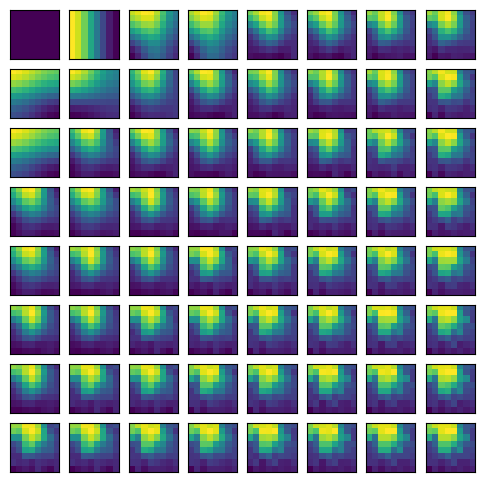

../python/ThermographyGUI/data/paper-20230914122540.csv


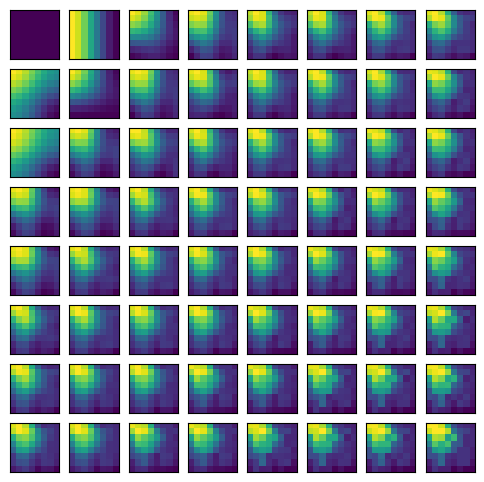

../python/ThermographyGUI/data/paper-20190104211519.csv


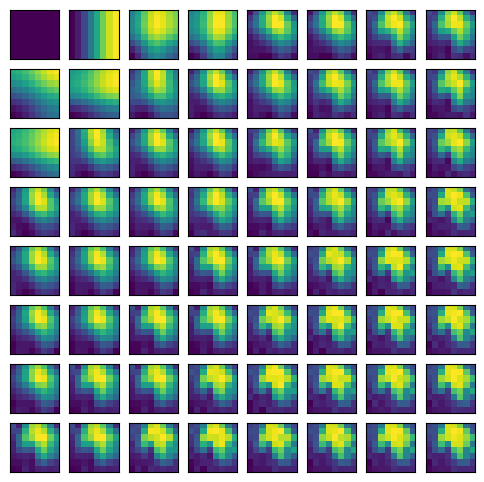

In [11]:
for n in range(8, len(data_files), 24):
    with open(data_files[n]) as f:
        print(data_files[n])
        data = np.array(f.read().split(',')).astype(float).reshape(8,8)
        dcted_data = dct(dct(data, norm='ortho').T, norm='ortho').T
        idcted_data = np.zeros([8,8])

        fig, axes = plt.subplots(8,8, figsize=(6,6))
        for i, j in ZIGZAG:
            idcted_data += dcted_data[i, j] * patterns[i, j]
            axes[i, j].imshow(idcted_data, cmap='viridis')
        for i in range(8):
            for j in range(8):
                axes[i, j].set_xticks([])
                axes[i, j].set_yticks([])
        plt.show()

## Conclusion

My neural network model does not see gaps between fingers. 